# Training a neural network using only two hidden neurons (1 hidden layer) 
## Justin Heyer

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import keras
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('training_data.csv', names=['input', 'expected'])

X_train = df.input
y_train = df.expected

df.head()

,input,expected
0,0.318328,0.750789
1,0.344461,-0.648483
2,0.357117,1.122161
3,0.461714,-0.024687
4,0.971318,2.558952


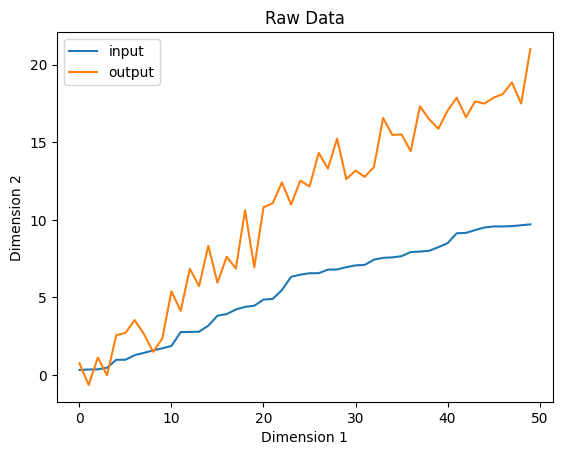

In [3]:
# Plot of raw data
plt.plot(X_train)
plt.plot(y_train)
plt.title('Raw Data')
plt.legend(['input', 'output'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.show()

In [4]:
# Initialising the ANN
classifier = Sequential()

initializer = keras.initializers.RandomUniform(minval=0.75, maxval=1, seed=2)

classifier.add(Dense(units=2, activation='relu', input_dim=1, bias_initializer=initializer))
classifier.add(Dense(units=1, bias_initializer=initializer))

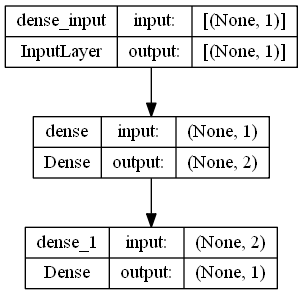

In [5]:
# print(classifier.summary())
keras.utils.plot_model(classifier, show_shapes=True)

In [6]:
# Training model
classifier.compile(optimizer='Adam', loss='MeanSquaredError')
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 1500)

Epoch 1/1500
2/2 [==============================] - 1s 11ms/step - loss: 134.2594
Epoch 2/1500
2/2 [==============================] - 0s 5ms/step - loss: 134.2138
Epoch 3/1500
2/2 [==============================] - 0s 5ms/step - loss: 134.1690
Epoch 4/1500
2/2 [==============================] - 0s 5ms/step - loss: 134.1220
Epoch 5/1500
2/2 [==============================] - 0s 6ms/step - loss: 134.0801
Epoch 6/1500
2/2 [==============================] - 0s 5ms/step - loss: 134.0341
Epoch 7/1500
2/2 [==============================] - 0s 5ms/step - loss: 133.9907
Epoch 8/1500
2/2 [==============================] - 0s 6ms/step - loss: 133.9465
Epoch 9/1500
2/2 [==============================] - 0s 6ms/step - loss: 133.9041
Epoch 10/1500
2/2 [==============================] - 0s 6ms/step - loss: 133.8612
Epoch 11/1500
2/2 [==============================] - 0s 5ms/step - loss: 133.8186
Epoch 12/1500
2/2 [==============================] - 0s 6ms/step - loss: 133.7767
Epoch 13/1500
2/2 [=====

2/2 [==============================] - 0s 7ms/step


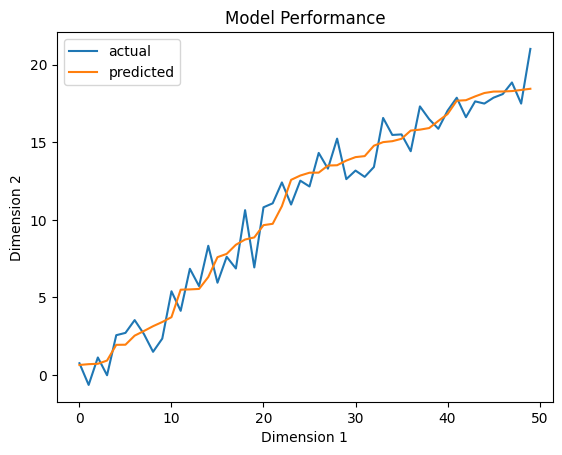

In [7]:
# Plot of model outputs vs. raw data outputs
y_pred = classifier.predict(X_train)

plt.plot(y_train)
plt.plot(y_pred)
plt.legend(['actual', 'predicted'])
plt.title('Model Performance')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.show()

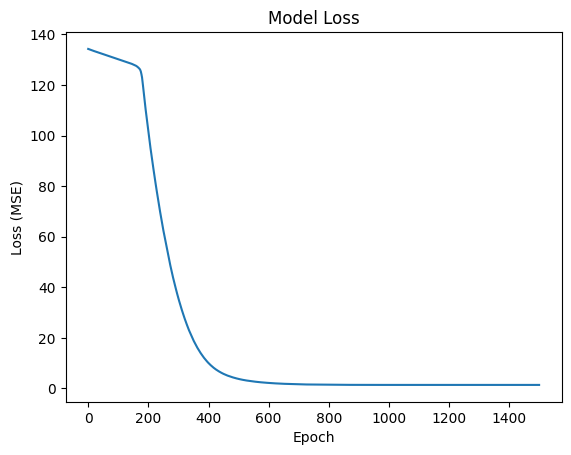

In [8]:
# Plot of loss as epoch grows
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')

plt.show()